In [8]:
from io import StringIO
import pandas as pd
import requests
import sys
import os

sys.path.append(os.path.abspath(".."))
from src.functions import read, groupby, listing, web_read
path ='C:/Users/w4t3r/Code/Manipulacao_dados/data/raw/'

In [9]:
london  = read(path + 'london.csv')
municipios = read(path + 'municipios.csv')
estado = read(path+'estados.csv')

In [10]:
london.head(30)

,Total,Sport,Age,Height,Weight,Sex
0,0,Judo,23,170.0,60.0,M
1,0,Athletics,33,193.0,125.0,M
2,0,Athletics,30,187.0,76.0,M
3,0,Boxing,24,NaN,NaN,M
4,0,Athletics,26,178.0,85.0,F
5,0,Handball,27,182.0,80.0,M
6,0,Rowing,30,182.0,73.0,F
7,0,Football,23,187.0,75.0,M
8,0,Athletics,27,190.0,80.0,M
9,0,Boxing,19,170.0,NaN,M


In [11]:
london.tail()

,Total,Sport,Age,Height,Weight,Sex
10379,0,Athletics,24,171.0,87.0,F
10380,0,Athletics,28,172.0,56.0,F
10381,0,Handball,27,180.0,87.0,M
10382,0,Athletics,25,173.0,62.0,F
10383,0,Basketball,24,221.0,110.0,M


In [12]:
london.info()

<class 'pandas.DataFrame'>
RangeIndex: 10384 entries, 0 to 10383
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Total   10384 non-null  int64  
 1   Sport   10384 non-null  str    
 2   Age     10384 non-null  int64  
 3   Height  9823 non-null   float64
 4   Weight  9104 non-null   float64
 5   Sex     10384 non-null  str    
dtypes: float64(2), int64(2), str(2)
memory usage: 486.9 KB


In [13]:
london.describe()

,Total,Age,Height,Weight
count,10384.000000,10384.000000,9823.000000,9104.000000
mean,0.052196,26.068856,176.907869,72.852812
std,0.250149,5.440561,11.295433,16.067462
min,0.000000,13.000000,132.000000,36.000000
25%,0.000000,22.000000,169.000000,61.000000
50%,0.000000,25.000000,177.000000,70.000000
75%,0.000000,29.000000,185.000000,81.000000
max,5.000000,71.000000,221.000000,218.000000


<Axes: >

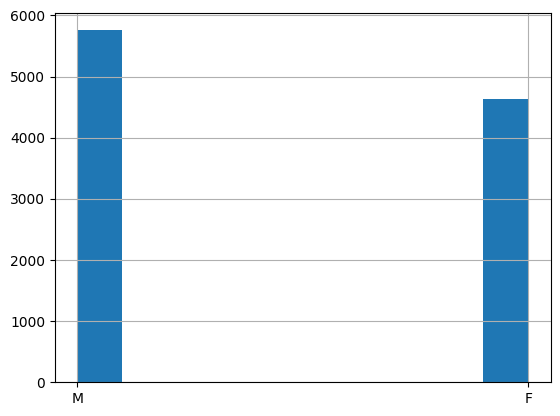

In [14]:
london.Sex.hist()

<Axes: >

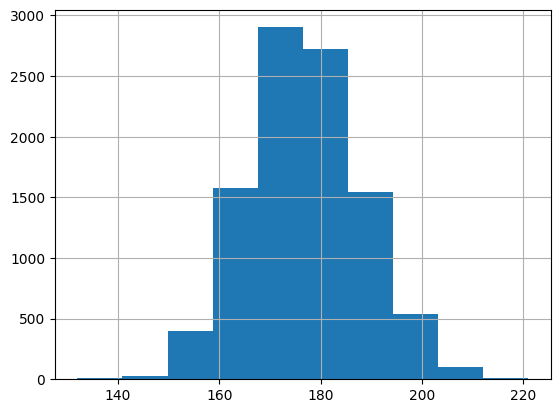

In [15]:
london.Height.hist()

In [16]:
london.Age.value_counts()

Age
23    890
25    847
24    838
22    793
27    775
26    774
21    649
28    614
29    586
30    500
20    492
31    386
19    336
32    335
18    246
33    242
34    184
35    138
17    124
36    119
37     82
16     66
39     60
38     49
40     38
41     32
43     28
42     27
15     26
44     16
46     15
45     11
49     10
48      9
50      7
47      7
14      7
52      5
51      5
54      3
56      3
53      3
57      2
65      2
58      1
71      1
13      1
Name: count, dtype: int64

In [17]:
london.Height.value_counts()

Height
170.0    537
180.0    508
178.0    454
175.0    429
168.0    369
        ... 
132.0      1
136.0      1
141.0      1
213.0      1
221.0      1
Name: count, Length: 79, dtype: int64

In [18]:
groupby(london, 'Age')

Age
13      1
14      7
15     26
16     66
17    124
18    246
19    336
20    492
21    649
22    793
23    890
24    838
25    847
26    774
27    775
28    614
29    586
30    500
31    386
32    335
33    242
34    184
35    138
36    119
37     82
38     49
39     60
40     38
41     32
42     27
43     28
44     16
45     11
46     15
47      7
48      9
49     10
50      7
51      5
52      5
53      3
54      3
56      3
57      2
58      1
65      2
71      1
dtype: int64

In [19]:
groupby(london,'Height')

Height
132.0    1
135.0    1
136.0    1
140.0    4
141.0    1
        ..
213.0    1
215.0    3
216.0    3
218.0    1
221.0    1
Length: 79, dtype: int64

In [20]:
groupby(london,['Age', 'Sex'])

Age  Sex
13   F       1
14   F       7
15   F      21
     M       5
16   F      59
            ..
57   F       1
     M       1
58   M       1
65   M       2
71   M       1
Length: 87, dtype: int64

In [21]:
total_age = groupby(london, 'Age')
total_age

Age
13      1
14      7
15     26
16     66
17    124
18    246
19    336
20    492
21    649
22    793
23    890
24    838
25    847
26    774
27    775
28    614
29    586
30    500
31    386
32    335
33    242
34    184
35    138
36    119
37     82
38     49
39     60
40     38
41     32
42     27
43     28
44     16
45     11
46     15
47      7
48      9
49     10
50      7
51      5
52      5
53      3
54      3
56      3
57      2
58      1
65      2
71      1
dtype: int64

In [22]:
london['Sport']

0              Judo
1         Athletics
2         Athletics
3            Boxing
4         Athletics
            ...    
10379     Athletics
10380     Athletics
10381      Handball
10382     Athletics
10383    Basketball
Name: Sport, Length: 10384, dtype: str

In [23]:
london['Sport'].unique()

<StringArray>
[                                                    'Judo',
                                                'Athletics',
                                                   'Boxing',
                                                 'Handball',
                                                   'Rowing',
                                                 'Football',
                                                   'Hockey',
                                               'Water Polo',
                                    'Synchronised Swimming',
                                            'Weightlifting',
                                               'Volleyball',
                                                'Wrestling',
                                                'Taekwondo',
                                                  'Fencing',
                                                   'Diving',
                                                'Badminton',
          

In [24]:
list_sport = listing(london,"Sport")
list_sport

['Judo',
 'Athletics',
 'Boxing',
 'Handball',
 'Rowing',
 'Football',
 'Hockey',
 'Water Polo',
 'Synchronised Swimming',
 'Weightlifting',
 'Volleyball',
 'Wrestling',
 'Taekwondo',
 'Fencing',
 'Diving',
 'Badminton',
 'Gymnastics - Artistic',
 'Swimming',
 'Cycling - Mountain Bike',
 'Triathlon',
 'Gymnastics - Rhythmic',
 'Basketball',
 'Shooting',
 'Equestrian',
 'Table Tennis',
 'Sailing',
 'Canoe Slalom',
 'Cycling - Road',
 'Archery',
 'Cycling - BMX',
 'Canoe Sprint',
 'Tennis',
 'Beach Volleyball',
 'Cycling - Track',
 'Cycling - Road, Cycling - Track',
 'Modern Pentathlon',
 'Cycling - Mountain Bike, Cycling - Track',
 'Trampoline',
 'Cycling - Mountain Bike, Cycling - Road',
 'Cycling - Mountain Bike, Cycling - Road, Cycling - Track',
 'Athletics, Triathlon',
 'Cycling - BMX, Cycling - Track']

In [25]:
len(list_sport)

42

In [26]:
london[london['Age']==20]['Height']

24       183.0
33       160.0
39       162.0
40       161.0
61       164.0
         ...  
10200    166.0
10218    163.0
10258    178.0
10267    183.0
10363    182.0
Name: Height, Length: 492, dtype: float64

<Axes: >

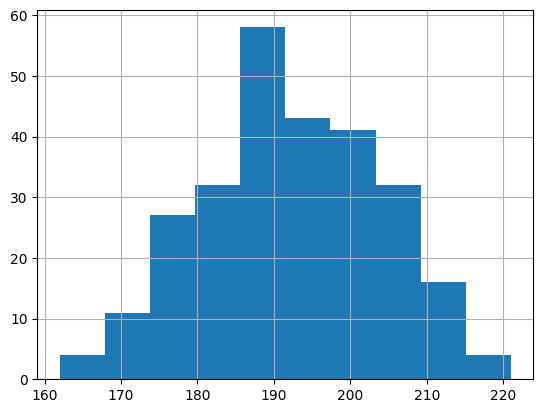

In [27]:
london[london['Sport']=='Basketball']['Height'].hist()

In [28]:
london.isna().sum()

Total        0
Sport        0
Age          0
Height     561
Weight    1280
Sex          0
dtype: int64

Municipios

In [29]:
municipios

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31
2,5200100,Abadiânia,-16.19700,-48.7057,0,52
3,3100203,Abaeté,-19.15510,-45.4444,0,31
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15
...,...,...,...,...,...,...
5565,2933604,Xique-Xique,-10.82300,-42.7245,0,29
5566,2517407,Zabelê,-8.07901,-37.1057,0,25
5567,3557154,Zacarias,-21.05060,-50.0552,0,35
5568,2114007,Zé Doca,-3.27014,-45.6553,0,21


In [30]:
municipios.info()

<class 'pandas.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   codigo_ibge  5570 non-null   int64  
 1   nome         5570 non-null   str    
 2   latitude     5570 non-null   float64
 3   longitude    5570 non-null   float64
 4   capital      5570 non-null   int64  
 5   codigo_uf    5570 non-null   int64  
dtypes: float64(2), int64(3), str(1)
memory usage: 261.2 KB


In [31]:
municipios.query("nome == 'Xique-Xique'")

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
5565,2933604,Xique-Xique,-10.823,-42.7245,0,29


In [32]:
municipios.query("capital == 1")

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
294,2800308,Aracaju,-10.909100,-37.0677,1,28
580,1501402,Belém,-1.455400,-48.4898,1,15
592,3106200,Belo Horizonte,-19.910200,-43.9266,1,31
642,1400100,Boa Vista,2.823840,-60.6753,1,14
755,5300108,Brasília,-15.779500,-47.9297,1,53
972,5002704,Campo Grande,-20.448600,-54.6295,1,50
1491,5103403,Cuiabá,-15.601000,-56.0974,1,51
1508,4106902,Curitiba,-25.419500,-49.2646,1,41
1812,4205407,Florianópolis,-27.594500,-48.5477,1,42
1831,2304400,Fortaleza,-3.716640,-38.5423,1,23


In [33]:
municipios.query("capital == 1 & codigo_uf==13")

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
2885,1302603,Manaus,-3.11866,-60.0212,1,13


In [34]:
municipios.loc[0:15,["nome","codigo_ibge"]]

,nome,codigo_ibge
0,Abadia de Goiás,5200050
1,Abadia dos Dourados,3100104
2,Abadiânia,5200100
3,Abaeté,3100203
4,Abaetetuba,1500107
5,Abaiara,2300101
6,Abaíra,2900108
7,Abaré,2900207
8,Abatiá,4100103
9,Abdon Batista,4200051


In [35]:
municipios.loc[[2881,2883,2885,2897]]

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
2881,1302504,Manacapuru,-3.29066,-60.6216,0,13
2883,1302553,Manaquiri,-3.44078,-60.4612,0,13
2885,1302603,Manaus,-3.11866,-60.0212,1,13
2897,1302702,Manicoré,-5.80462,-61.2895,0,13


In [36]:
municipios_name = municipios.set_index('nome')
municipios_name

,codigo_ibge,latitude,longitude,capital,codigo_uf
nome,,,,,
Abadia de Goiás,5200050,-16.75730,-49.4412,0,52
Abadia dos Dourados,3100104,-18.48310,-47.3916,0,31
Abadiânia,5200100,-16.19700,-48.7057,0,52
Abaeté,3100203,-19.15510,-45.4444,0,31
Abaetetuba,1500107,-1.72183,-48.8788,0,15
...,...,...,...,...,...
Xique-Xique,2933604,-10.82300,-42.7245,0,29
Zabelê,2517407,-8.07901,-37.1057,0,25
Zacarias,3557154,-21.05060,-50.0552,0,35


In [37]:
municipios_name.loc[["São Paulo", "Rio de Janeiro", "Manaus", "Belém"]]

,codigo_ibge,latitude,longitude,capital,codigo_uf
nome,,,,,
São Paulo,3550308,-23.53290,-46.6395,1,35
Rio de Janeiro,3304557,-22.91290,-43.2003,1,33
Manaus,1302603,-3.11866,-60.0212,1,13
Belém,1501402,-1.45540,-48.4898,1,15
Belém,2501906,-6.74261,-35.5166,0,25
Belém,2700805,-9.57047,-36.4904,0,27


In [38]:
estado

,codigo_uf,uf,nome
0,11,RO,Rondônia
1,12,AC,Acre
2,13,AM,Amazonas
3,14,RR,Roraima
4,15,PA,Pará
5,16,AP,Amapá
6,17,TO,Tocantins
7,21,MA,Maranhão
8,22,PI,Piauí
9,23,CE,Ceará


In [39]:
municipios.merge(estado, how='inner', on = 'codigo_uf')

,codigo_ibge,nome_x,latitude,longitude,capital,codigo_uf,uf,nome_y
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52,GO,Goiás
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31,MG,Minas Gerais
2,5200100,Abadiânia,-16.19700,-48.7057,0,52,GO,Goiás
3,3100203,Abaeté,-19.15510,-45.4444,0,31,MG,Minas Gerais
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15,PA,Pará
...,...,...,...,...,...,...,...,...
5565,2933604,Xique-Xique,-10.82300,-42.7245,0,29,BA,Bahia
5566,2517407,Zabelê,-8.07901,-37.1057,0,25,PB,Paraíba
5567,3557154,Zacarias,-21.05060,-50.0552,0,35,SP,São Paulo
5568,2114007,Zé Doca,-3.27014,-45.6553,0,21,MA,Maranhão


Web

In [40]:
am = web_read('https://en.wikipedia.org/wiki/Amazonas_(Brazilian_state)', 'Manipulação de dados (contato:alessandro.sil.lem.pro@gmail.com) \ requests / 2.0x',r"(?i)Historical population")
am

,Year,Pop.,±%
0,1872,57610,—
1,1890,147915,+156.8%
2,1900,249756,+68.9%
3,1920,363166,+45.4%
4,1940,438008,+20.6%
5,1950,514099,+17.4%
6,1960,721215,+40.3%
7,1970,960934,+33.2%
8,1980,1449135,+50.8%
9,1991,2102901,+45.1%


In [41]:
resposta = requests.get('https://servicodados.ibge.gov.br/api/v3/agregados/9514/periodos/2022/\variaveis/93?localidades=N6[all]')
resposta

<Response [200]>